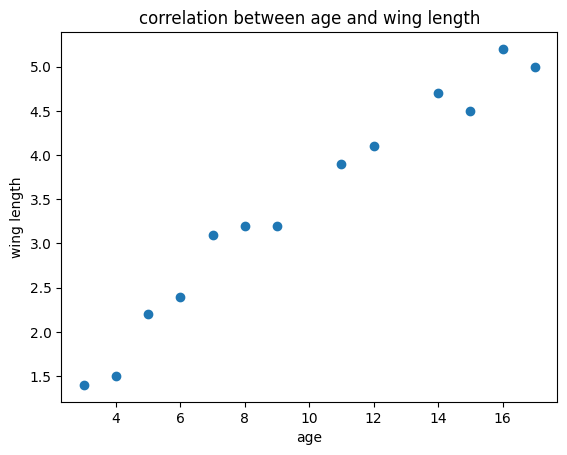

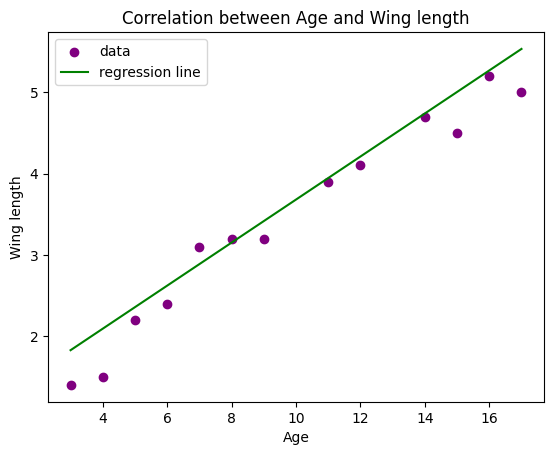

the slope of the regression line is 0.26468412066021585
Yes, we can reject the null hypothesis


In [30]:
from matplotlib import pyplot as plt
import numpy as np
import statistics as st
import scipy.stats as scipy
import math

#raw data
x = np.array([3, 4, 5, 6, 7, 8, 9 , 11, 12, 14, 15, 16, 17]) #age
y = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0]) #wing length
n = 13
#visualizing the data
plt.scatter(x, y)

#making graph pretty
plt.title("correlation between age and wing length")
plt.xlabel("age")
plt.ylabel("wing length")

plt.show()

#calculating and plotting the regression line
#first calculate slope, b
b = (sum(x*y for x,y in zip(x,y)) - ((sum(x) * sum(y))/n)) / ((sum(x**2))- ((sum(x)**2) / n))

#calculate intercept, a
x_bar = st.mean(x)
a = st.mean(y) - (b * x_bar)

#regression line equation
e = 0 # e is representative of noise, for now assuming 0...
regression_line = a + (b * x) + e


#plotting data with regression line
plt.scatter(x, y, color = 'purple', label = 'data')
plt.plot(x, regression_line, color = 'green', label = 'regression line')
plt.title(f"Correlation between Age and Wing length")
plt.xlabel("Age")
plt.ylabel("Wing length")
plt.legend()
plt.show()

print(f"the slope of the regression line is {b}")
if b != 0:
  print("Yes, we can reject the null hypothesis")
else:
  print("No, we cannot reject the null hypothesis")



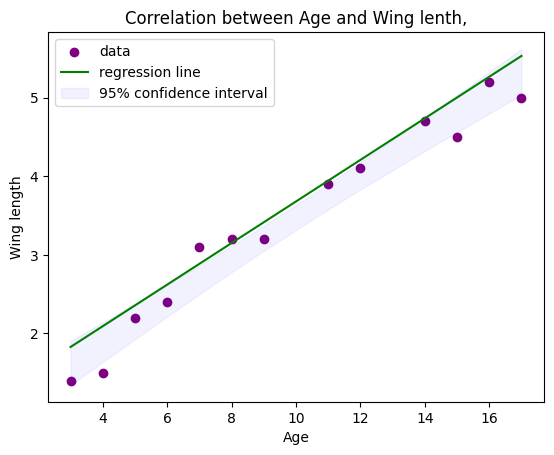

The coefficient of determination is -1.4849459305634607, and the pearson correlation coefficient is 0.981520377681628


In [26]:
from matplotlib import pyplot as plt
import numpy as np
import statistics as st
import scipy.stats as scipy
import statsmodels.api as sm
from sklearn.metrics import r2_score

#raw data
x = np.array([3, 4, 5, 6, 7, 8, 9 , 11, 12, 14, 15, 16, 17]) #age
y = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0]) #wing length
n = 13

# get intercept
intercept = sm.add_constant(x)

#fit regression
model = sm.OLS(y, intercept).fit()

#get estimates
estimates = model.predict(intercept)

#calculate the standard error of the estimates
predictions_se = model.get_prediction(intercept).se_mean

#Calculate the confidence intervals on the slope of the regression
CI = model.get_prediction(intercept).conf_int()

#plot confidence intervals
plt.scatter(x, y, color = 'purple', label = 'data')
plt.plot(x, regression_line, color = 'green', label = 'regression line')
plt.fill_between(x, CI[:, 0], CI[:, 1], alpha = 0.05, color = 'blue', label = '95% confidence interval')
plt.title(f"Correlation between Age and Wing lenth,")
plt.xlabel("Age")
plt.ylabel("Wing length")
plt.legend()
plt.show()

#calculate r2 (coefficient of determination)
r2 = r2_score (x, y)

#calculate r
r,pvalue = scipy.pearsonr(x, y)

print(f"The coefficient of determination is {r2}, and the pearson correlation coefficient is {r}")

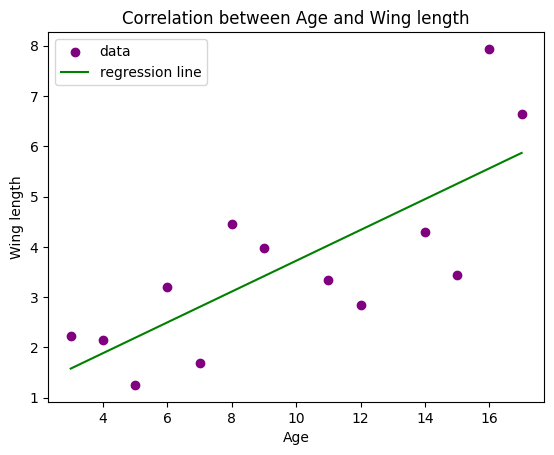

the slope of the regression line is 0.3065700504828284
Yes, we can reject the null hypothesis


In [34]:
from matplotlib import pyplot as plt
import numpy as np
import statistics as st
import scipy.stats as scipy
import math

#raw data
x = np.array([3, 4, 5, 6, 7, 8, 9 , 11, 12, 14, 15, 16, 17]) #age
y = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0]) #wing length
n = 13

#add noise to data
y_true = b * x.flatten() + a
noise_level = 1.25
noise = np.random.normal(0, noise_level, y_true.shape)
y_noisy = y_true + noise

#calculating and plotting the regression line
#first calculate slope, b
b = (sum(x*y_noisy for x,y_noisy in zip(x,y_noisy)) - ((sum(x) * sum(y_noisy))/n)) / ((sum(x**2))- ((sum(x)**2) / n))

#calculate intercept, a
x_bar = st.mean(x)
a = st.mean(y) - (b * x_bar)

#regression line equation

regression_line = a + (b * x) + e


#plotting data with regression line
plt.scatter(x, y_noisy, color = 'purple', label = 'data')
plt.plot(x, regression_line, color = 'green', label = 'regression line')
plt.title(f"Correlation between Age and Wing length")
plt.xlabel("Age")
plt.ylabel("Wing length")
plt.legend()
plt.show()


print(f"the slope of the regression line is {b}")
if b != 0:
  print("Yes, we can reject the null hypothesis")
else:
  print("No, we cannot reject the null hypothesis")